In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [4]:
#Load Dataset
data = pd.read_csv(r"C:\Users\palag\Downloads\traffic_volume1.csv")

In [5]:
data.head()

,holiday,temp,rain,snow,weather,date,Time,traffic_volume
0,holiday,288.28,0.0,0.0,Clouds,02-10-2012,09:00:00,5545
1,holiday,289.36,0.0,0.0,Clouds,02-10-2012,10:00:00,4516
2,holiday,289.58,0.0,0.0,Clouds,02-10-2012,11:00:00,4767
3,holiday,290.13,0.0,0.0,Clouds,02-10-2012,12:00:00,5026
4,holiday,291.14,0.0,0.0,Clouds,02-10-2012,13:00:00,4918


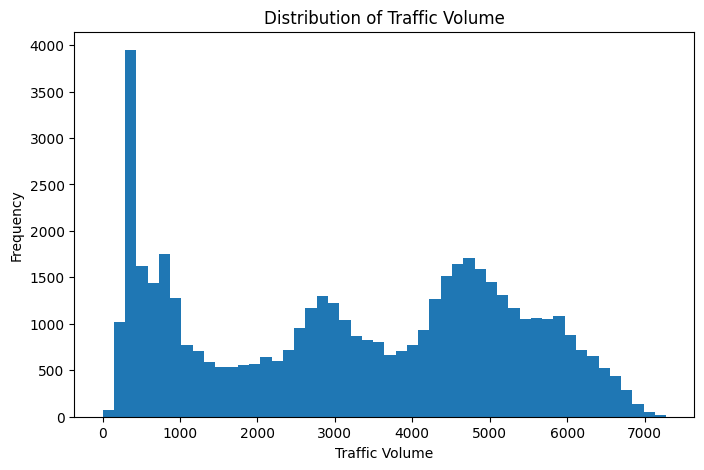

In [11]:
plt.figure(figsize=(8,5))
plt.hist(data["traffic_volume"],bins=50)
plt.xlabel("Traffic Volume")
plt.ylabel("Frequency")
plt.title("Distribution of Traffic Volume")
plt.show()

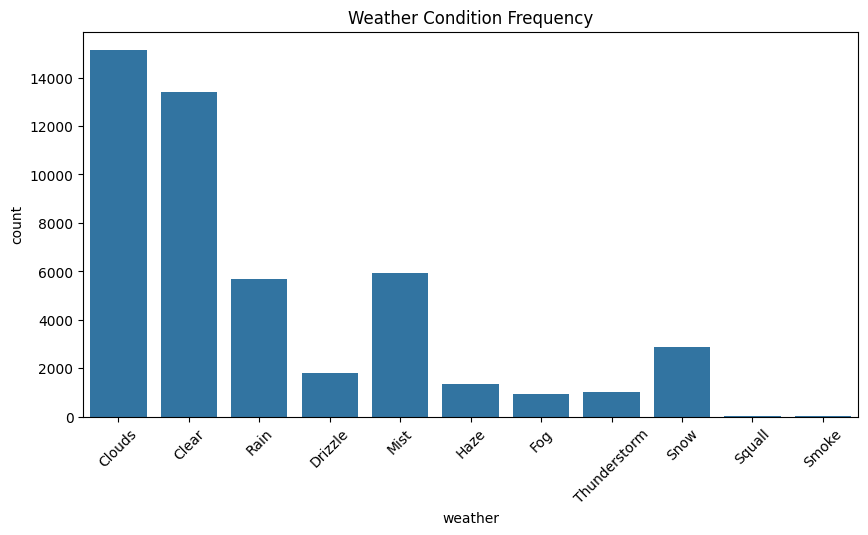

In [12]:
plt.figure(figsize=(10,5))
sns.countplot(x=data["weather"])
plt.xticks(rotation=45)
plt.title("Weather Condition Frequency")
plt.show()

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   holiday         1780 non-null   object 
 1   temp            48151 non-null  float64
 2   rain            48202 non-null  float64
 3   snow            48192 non-null  float64
 4   weather         48155 non-null  object 
 5   date            48204 non-null  object 
 6   Time            48204 non-null  object 
 7   traffic_volume  48204 non-null  int64  
dtypes: float64(3), int64(1), object(4)
memory usage: 2.9+ MB


In [18]:
data.describe()

,temp,rain,snow,traffic_volume
count,48151.000000,48202.000000,48192.000000,48204.000000
mean,281.205351,0.334278,0.000222,3259.818355
std,13.343675,44.790062,0.008169,1986.860670
min,0.000000,0.000000,0.000000,0.000000
25%,272.160000,0.000000,0.000000,1193.000000
50%,282.460000,0.000000,0.000000,3380.000000
75%,291.810000,0.000000,0.000000,4933.000000
max,310.070000,9831.300000,0.510000,7280.000000


In [19]:
data["temp"] = data["temp"].fillna(data["temp"].mean())
data["rain"] = data["rain"].fillna(data["rain"].mean())
data["snow"] = data["snow"].fillna(data["snow"].mean())


In [20]:
data["holiday"] = data["holiday"].fillna("None")
data["weather"] = data["weather"].fillna("Clouds")


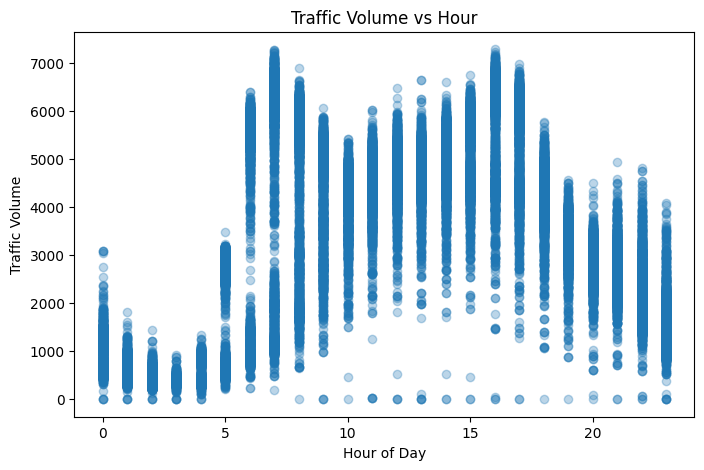

In [ ]:
#Traffic_volume vs Hour
plt.figure(figsize=(8,5))
plt.scatter(data["hours"], data["traffic_volume"], alpha=0.3)
plt.xlabel("Hour of Day")
plt.ylabel("Traffic Volume")
plt.title("Traffic Volume vs Hour")
plt.show()

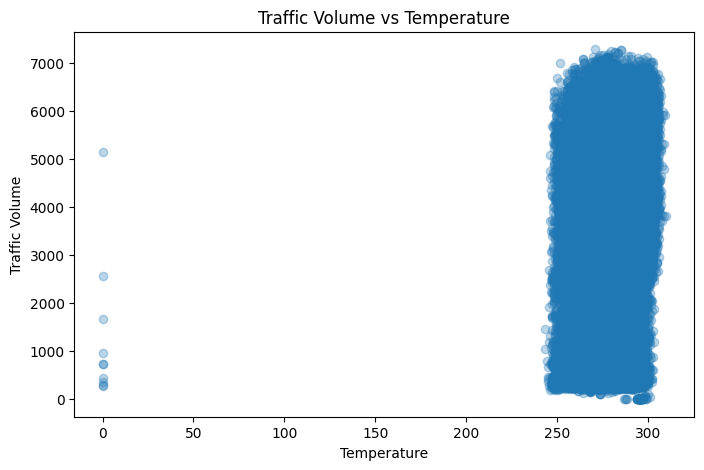

In [43]:
# Traffic _volume vs temparature
plt.figure(figsize=(8,5))
plt.scatter(data["temp"], data["traffic_volume"], alpha=0.3)
plt.xlabel("Temperature")
plt.ylabel("Traffic Volume")
plt.title("Traffic Volume vs Temperature")
plt.show()

In [21]:
data.isnull().sum()

holiday           0
temp              0
rain              0
snow              0
weather           0
date              0
Time              0
traffic_volume    0
dtype: int64

In [22]:
data[["day", "month", "year"]] = data["date"].str.split("-", expand=True)
data.drop(columns=["date"], inplace=True)


In [23]:
data[["hours", "minutes", "seconds"]] = data["Time"].str.split(":", expand=True)
data.drop(columns=["Time"], inplace=True)


In [24]:
for col in ["day","month","year","hours","minutes","seconds"]:
    data[col] = data[col].astype(int)

In [25]:
data.head()

,holiday,temp,rain,snow,weather,traffic_volume,day,month,year,hours,minutes,seconds
0,holiday,288.28,0.0,0.0,Clouds,5545,2,10,2012,9,0,0
1,holiday,289.36,0.0,0.0,Clouds,4516,2,10,2012,10,0,0
2,holiday,289.58,0.0,0.0,Clouds,4767,2,10,2012,11,0,0
3,holiday,290.13,0.0,0.0,Clouds,5026,2,10,2012,12,0,0
4,holiday,291.14,0.0,0.0,Clouds,4918,2,10,2012,13,0,0


In [26]:
holiday_encoder = LabelEncoder()
weather_encoder = LabelEncoder()

In [27]:
data["holiday_enc"] = holiday_encoder.fit_transform(data["holiday"])
data["weather_enc"] = weather_encoder.fit_transform(data["weather"])

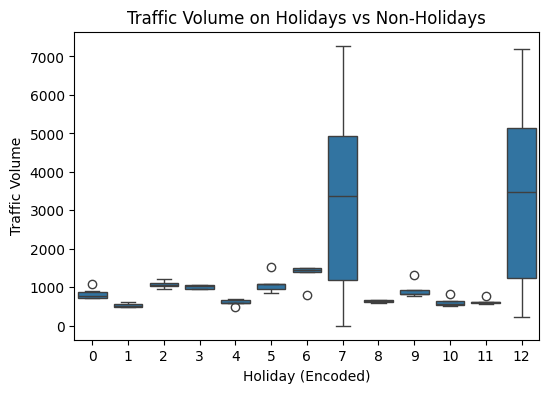

In [39]:
plt.figure(figsize=(6,4))
sns.boxplot(x=data["holiday_enc"], y=data["traffic_volume"])
plt.xlabel("Holiday (Encoded)")
plt.ylabel("Traffic Volume")
plt.title("Traffic Volume on Holidays vs Non-Holidays")
plt.show()

In [28]:
data.drop(columns=["holiday", "weather"], inplace=True)

In [29]:
data.head()

,temp,rain,snow,traffic_volume,day,month,year,hours,minutes,seconds,holiday_enc,weather_enc
0,288.28,0.0,0.0,5545,2,10,2012,9,0,0,12,1
1,289.36,0.0,0.0,4516,2,10,2012,10,0,0,12,1
2,289.58,0.0,0.0,4767,2,10,2012,11,0,0,12,1
3,290.13,0.0,0.0,5026,2,10,2012,12,0,0,12,1
4,291.14,0.0,0.0,4918,2,10,2012,13,0,0,12,1


In [30]:
X = data.drop("traffic_volume", axis=1)
y = data["traffic_volume"]

X.columns

Index(['temp', 'rain', 'snow', 'day', 'month', 'year', 'hours', 'minutes',
       'seconds', 'holiday_enc', 'weather_enc'],
      dtype='object')

In [31]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [32]:
print(holiday_encoder.classes_)
print(weather_encoder.classes_)

['Christmas Day' 'Columbus Day' 'Independence Day' 'Labor Day'
 'Martin Luther King Jr Day' 'Memorial Day' 'New Years Day' 'None'
 'State Fair' 'Thanksgiving Day' 'Veterans Day' 'Washingtons Birthday'
 'holiday']
['Clear' 'Clouds' 'Drizzle' 'Fog' 'Haze' 'Mist' 'Rain' 'Smoke' 'Snow'
 'Squall' 'Thunderstorm']


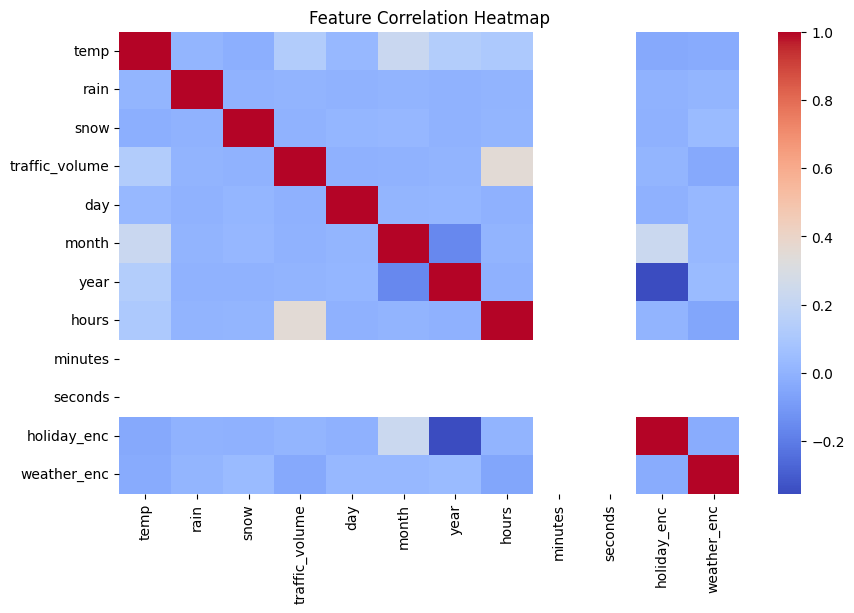

In [38]:
plt.figure(figsize=(10,6))
corr = data.corr()
sns.heatmap(corr, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

In [33]:
#train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

In [34]:
#Model Training
model = RandomForestRegressor(n_estimators=100,random_state=42)

model.fit(X_train, y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""squared_error"", ""absolute_error"", ""friedman_mse"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in Poisson deviance to find splits.Training using ""absolute_error"" is significantly slowerthan when using ""squared_error""... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 1.0 Poisson criterion.",'squared_error'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=1.0The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None or 1.0, then `max_features=n_features`... note:: The default of 1.0 is equivalent to bagged trees and more randomness can be achieved by setting smaller values, e.g. 0.3... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to 1.0.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",1.0
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsample

In [35]:
y_predict = model.predict(X_test)
print("R2 SCORE:", r2_score(y_test, y_predict))

R2 SCORE: 0.842220833546321


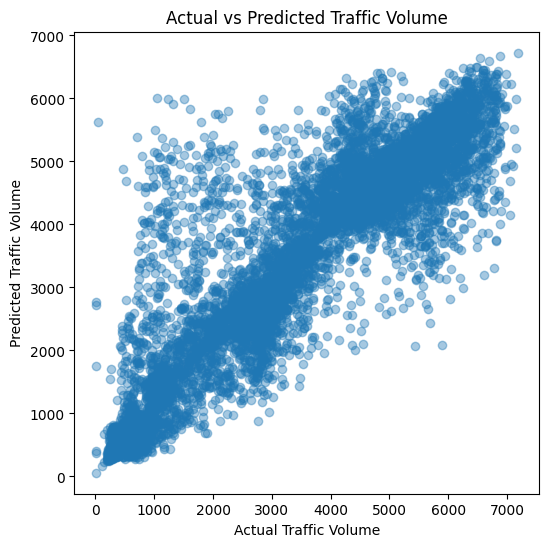

In [37]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_predict, alpha=0.4)
plt.xlabel("Actual Traffic Volume")
plt.ylabel("Predicted Traffic Volume")
plt.title("Actual vs Predicted Traffic Volume")
plt.show()

In [36]:
pickle.dump(model,open("model.pkl","wb"))
pickle.dump(scaler,open("scaler.pkl","wb"))
pickle.dump(holiday_encoder,open("holiday_encoder.pkl","wb"))
pickle.dump(weather_encoder,open("weather_encoder.pkl","wb"))

print("PKL model and encoders saved successfully")

PKL model and encoders saved successfully
